<a href="https://colab.research.google.com/github/Neelanjan-Goswami/ML-Internship-B/blob/master/Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis of Car Features**

**Car Features and MSRP**

Includes features such as make, model, year, and engine type to predict price

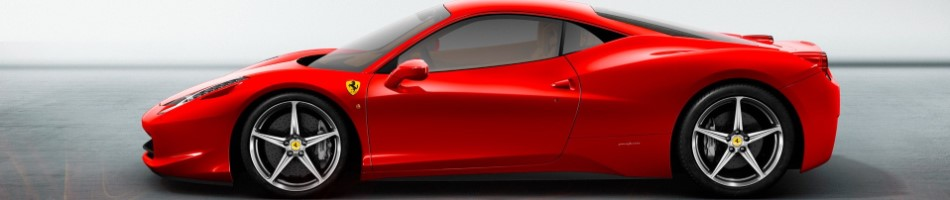

Cars dataset with features including make, model, year, engine, and other properties of the car used to predict its price.

### **Exploratory data analysis in Python.**

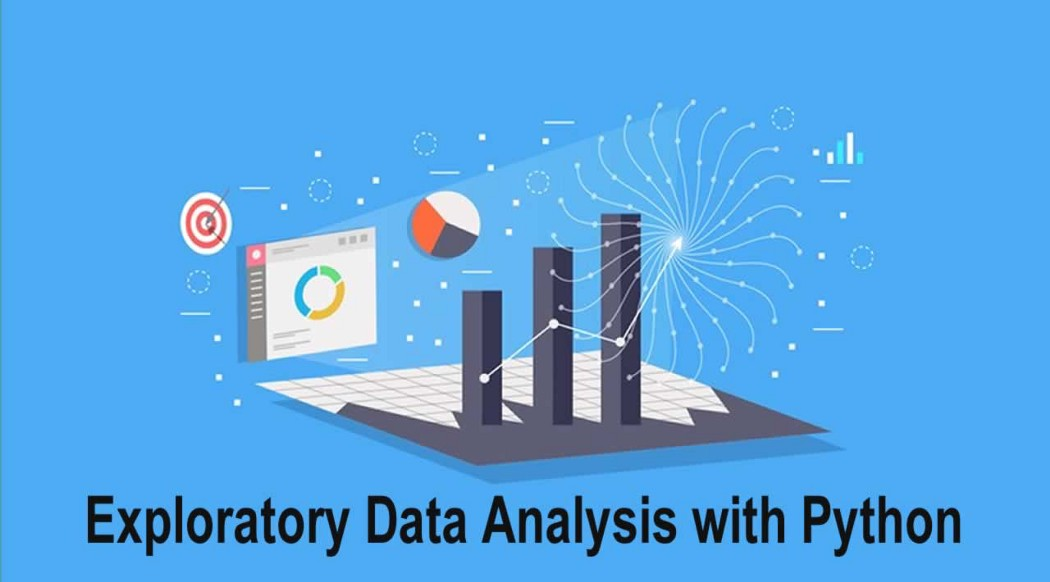


### **What is Exploratory Data Analysis?**
Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.


### **How to perform Exploratory Data Analysis?**
This is one such question that everyone is keen on knowing the answer. Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this tutorial you can understand some common methods and plots that would be used in the EDA process.


### **What data are we exploring today?**
Since I am a huge fan of cars, I got a very beautiful data-set of cars from Kaggle. The data-set can be downloaded from here. 

To give a piece of brief information about the data set this data contains more of 12, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine Size, HP, Transmission Type, highway MPG, city MPG and many more.

###  **Context**
As a data scientist, the majority of your time will be spent on data pre-processing i.e.
making sure you have the right data in the right format. Once this is done, you get a
sense of your dataset through applying some descriptive statistics and then, you move
on to the exploration stage wherein you plot various graphs and mine the hidden
insights. In this project, you as a data scientist are expected to perform Exploratory data
analysis on how the different features of a car and its price are related. The data comes
from the Kaggle dataset "Car Features and MSRP". It describes almost 12,000 car
models, sold in the USA between 1990 and 2017, with the market price (new or used)
and some features.

### **Objective**
The objective of the project is to do data pre-processing and exploratory data analysis
of the dataset

### **Data Description**


*   Make : Car Make
*   Model : Car Model
*   Year : Car Year (Marketing)
*   Engine Fuel Type : Engine Fuel Type
*   Engine HP Engine : HorsePower (HP)
*   Engine Cylinders : Engine Cylinders
*   Transmission Type : Transmission Type
*   Driven_Wheels : Driven Wheels
*   Number of Doors : Number of Doors
*   Market Category : Market Category
*   Vehicle Size : Size of Vehicle
*   Vehicle Style : Type of Vehicle
*   highway MPG : Highway MPG
*   city mpg : City MPG
*   Popularity : Popularity (Twitter)
*   MSRP Manufacturer : Suggested Retail Price


















### **Steps**
1. Import the dataset and the necessary libraries, check datatype, statistical summary,
shape, null values etc.
2. Are there any columns in the dataset which you think are of less relevance. If so, give
your reasoning and drop them.
3. Rename the columns "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission
Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city
mpg": "MPG-C", "MSRP": "Price"
4. Check for any duplicates in the data, check for null values and missing data and remove
them.
5. Plot graphs of various columns to check for outliers and remove those data points from the
dataset.
6. What car brands are the most represented in the dataset and find the average price among
the top car brands.
7. Plot the correlation matrix and document your insights.
8. Perform EDA and plot different graphs and document your findings (Try to see how other
variables affect the price of the car)
9. (Extra Credits)Split the dataset into 80 and 20 ratio and build a machine learning model with
Price as the target variable
10. (Extra Credits)Try different algorithms and check their performance over metrics like R
square, RMSE, MAE etc and document your findings



### 1.   **Import the dataset and the necessary libraries, check datatype, statistical summary, shape, null values etc.**



1.1 **Importing the required libraries for EDA**

Below are the libraries that are used in order to perform EDA (Exploratory data analysis).

In [1]:
# Importing required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline   

sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1.2. **Loading the data into the data frame.**

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
#reading Data in python
import io
car_data = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [4]:
# To display the top 5 rows
car_data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
# To display the bottom 5 rows
car_data.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


1.3. **Checking the types of data, statistical summary, shape, null values**

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string or object, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [6]:
#Concise summary of a DataFrame
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
#Statistical summary
car_data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [8]:
# Checking the data type
car_data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [9]:
#Shape of DataFrame
car_data.shape

(11914, 16)

In [10]:
#Null values present
car_data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### 2. **Are there any columns in the dataset which you think are of less relevance. If so, give your reasoning and drop them.**

2.1. **Dropping irrelevant columns**

This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Engine Fuel Type, Market Category and Number of doors doesn't make any sense to me so I just dropped for this instance.

In [11]:
#Dropping the uneccessary Columns
car_data = car_data.drop(['Engine Fuel Type', 'Number of Doors','Market Category'], axis=1)
car_data.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


### 3. **Rename the columns "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"**

In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set.

In [12]:
#Renaming the Columns
car_data = car_data.rename(columns={'Engine HP': 'HP', 'Engine Cylinders': 'Cylinders', 'Transmission Type': 'Transmission', 'Driven_Wheels': 'Drive Mode', 'highway MPG': 'MPG-H', 'city mpg': 'MPG-C', 'MSRP': 'Price' })
car_data.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


### 4. **Check for any duplicates in the data, check for null values and missing data and remove them.**

4.1 **Dropping the duplicate rows**

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 10925 data meaning that I had 989 of duplicate data.

In [13]:
# Total number of rows and columns
car_data.shape

(11914, 13)

In [14]:
# Rows containing duplicate data
duplicate_rows_car_data = car_data[car_data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_car_data.shape)
print()
print(duplicate_rows_car_data)

number of duplicate rows:  (792, 13)

         Make     Model  Year     HP  ...  MPG-H MPG-C Popularity  Price
14        BMW  1 Series  2013  230.0  ...     28    19       3916  31500
18       Audi       100  1992  172.0  ...     24    17       3105   2000
20       Audi       100  1992  172.0  ...     24    17       3105   2000
24       Audi       100  1993  172.0  ...     24    17       3105   2000
25       Audi       100  1993  172.0  ...     24    17       3105   2000
...       ...       ...   ...    ...  ...    ...   ...        ...    ...
11481  Suzuki      X-90  1998   95.0  ...     26    22        481   2000
11603   Volvo      XC60  2017  302.0  ...     29    20        870  46350
11604   Volvo      XC60  2017  240.0  ...     30    23        870  40950
11708  Suzuki       XL7  2008  252.0  ...     22    15        481  29149
11717  Suzuki       XL7  2008  252.0  ...     22    16        481  27499

[792 rows x 13 columns]


Now let us remove the duplicate data because it's ok to remove them.

In [15]:
# Used to count the number of rows before removing the data
car_data.count() 

Make             11914
Model            11914
Year             11914
HP               11845
Cylinders        11884
Transmission     11914
Drive Mode       11914
Vehicle Size     11914
Vehicle Style    11914
MPG-H            11914
MPG-C            11914
Popularity       11914
Price            11914
dtype: int64

So seen above there are 11914 rows and we are removing 989 rows of duplicate data.

In [16]:
# Dropping the duplicates 
car_data = car_data.drop_duplicates()
car_data.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [17]:
car_data.shape

(11122, 13)

In [18]:
# Counting the number of rows after removing duplicates.
car_data.count()

Make             11122
Model            11122
Year             11122
HP               11053
Cylinders        11092
Transmission     11122
Drive Mode       11122
Vehicle Size     11122
Vehicle Style    11122
MPG-H            11122
MPG-C            11122
Popularity       11122
Price            11122
dtype: int64

4.2 **Dropping the missing or null values.**

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10, 000 values this is a small number and this is negligible so I just dropped those values.

In [19]:
# Finding the null values.
print(car_data.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


This is the reason in the above step while counting both Cylinders and Horsepower (HP) had 10856 and 10895 over 10925 rows.

In [20]:
# Dropping the missing values.
car_data = car_data.dropna() 
car_data.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

Now we have removed all the rows which contain the Null or N/A values (Cylinders and Horsepower (HP)).

In [21]:
# After dropping the values
print(car_data.isnull().sum()) 

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


### 5. **Plot graphs of various columns to check for outliers and remove those data points from the dataset.**

5.1 **Plotting graphs of various columns to check outliers**

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It’s often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it’s a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers.





Box Plot are used to represent the outliers graphically :-


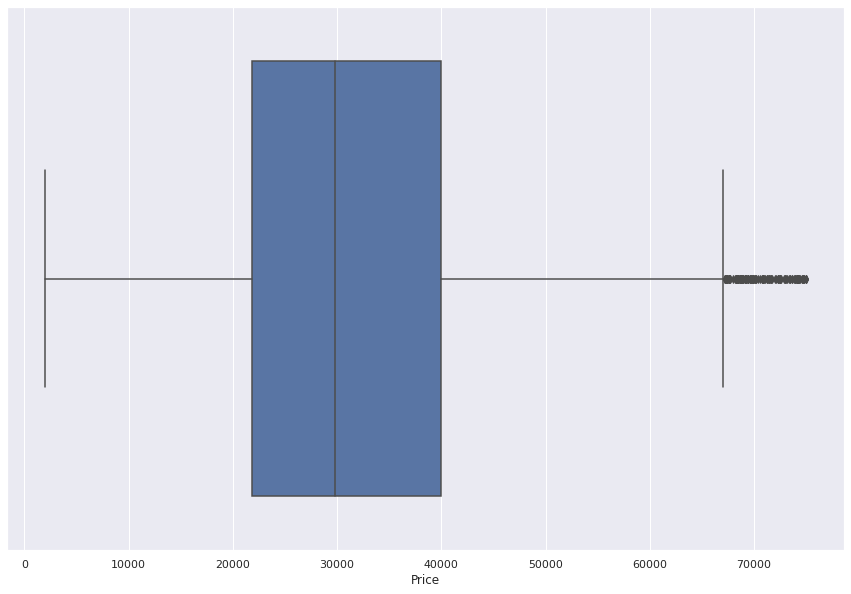

In [40]:
#Plotting Graphs of Data(Columns)
plt.figure(figsize=(15,10))
sns.boxplot(x=car_data['Price'])

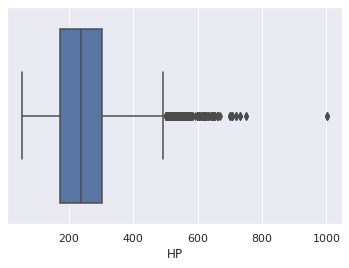

In [25]:
sns.boxplot(x=car_data['HP'])

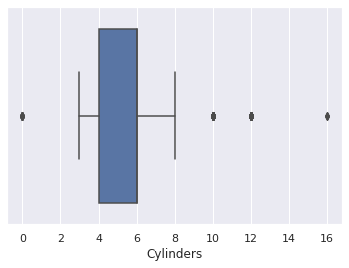

In [26]:
sns.boxplot(x=car_data['Cylinders'])

In [27]:
#Finding IQR
Q1 = car_data.quantile(0.25)
Q3 = car_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


5.3 **Remove those data points from the dataset.**

We don’t worry about the above values because it’s not important to know each and every one of them because it's just important to know how to use this technique in order to remove the outliers.

In [28]:
#Removing Outliners
car_data = car_data[~((car_data < (Q1-1.5 * IQR)) |(car_data > (Q3 + 1.5 * IQR))).any(axis=1)]
car_data.shape

(8546, 13)

Results upon removing outliers :-

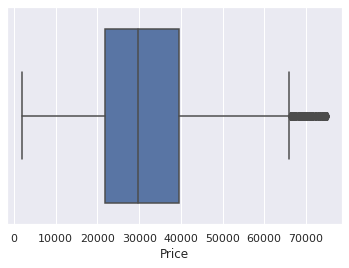

In [ ]:
sns.boxplot(x=car_data['Price'])

As seen above there were around 1600 rows were outliers. But you cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers. Something is better than nothing.


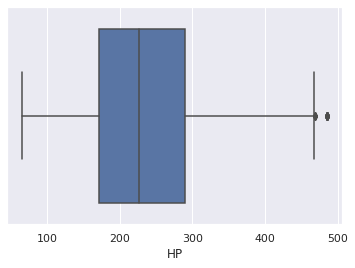

In [32]:
sns.boxplot(x=car_data['HP'])

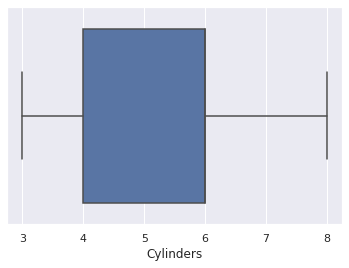

In [31]:
sns.boxplot(x=car_data['Cylinders'])

###6. **What car brands are the most represented in the dataset and find the average price among the top car brands.**

### 6.1 **Top 10 car brands are the most represented in the dataset**

In [34]:
# Percentage of car per brand
counts = car_data['Make'].value_counts()*100/sum(car_data['Make'].value_counts())

In [35]:
# Top 10 car brands
popular_labels = counts.index[:10]

Plotting a Horizontal Bar Graph :-

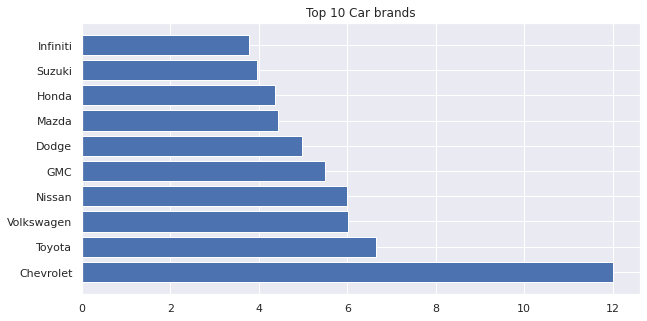

In [36]:
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

### 6.2 **The average price among the top car brands**

In [37]:
prices = car_data[['Make','Price']].loc[(car_data['Make'] == 'Chevrolet')|
               (car_data['Make'] == 'Ford')|
               (car_data['Make'] == 'Volkswagen')|
               (car_data['Make'] == 'Toyota')|
               (car_data['Make'] == 'Dodge')|
               (car_data['Make'] == 'Nissan')|
               (car_data['Make'] == 'GMC')|
               (car_data['Make'] == 'Honda')|
               (car_data['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


### 7. **Plot the correlation matrix and document your insights.**

### 7.1 **Tabular correlation matrix**

In [38]:
car_data.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


### 7.2 **Insights**




**High correlation between**


1.   Cylinders & HP
2.   Highway mpg & City mpg

The relationship : More the cylinders there are, more powerful the car is



**High anticorrelation**
1. Cylinders & highway mpg

The relationship : Highway mpg / Engine Cylinders have a strong negative correlation with highway and city MPG because lower MPG figures mean higher fuel consumption.



### 7.3 **Graphical representation of correlation matrix**

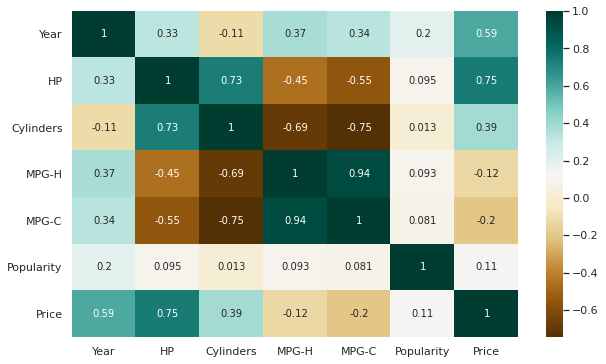

In [45]:
#Plotting Correlation Matrix
plt.figure(figsize=(10,6))
corrMatrix = car_data.corr()
sns.heatmap(corrMatrix,cmap="BrBG", annot=True)

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares


### 8. **Perform EDA and plot different graphs and document your findings**

### 8.1 **Identifying the type of data**
To identify the data types, I use the info method. The info method prints a summary of the data in the data frame along with its data types. Here, there are 8546 entries (0–8545 rows). The data frame after removing irrelevant columns comprises 13 columns. Here the Make, MSRP is of an object type whereas Engine size and Cylinders are of float type and Horsepower, MPG_City, MPG_Highway, Weight, Wheelbase and Length are of integer type. Hence there are 2 object types, 2 float types and 6 integer types of data present in the data frame.




In [42]:
# To identify the type of data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8546 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           8546 non-null   object 
 1   Model          8546 non-null   object 
 2   Year           8546 non-null   int64  
 3   HP             8546 non-null   float64
 4   Cylinders      8546 non-null   float64
 5   Transmission   8546 non-null   object 
 6   Drive Mode     8546 non-null   object 
 7   Vehicle Size   8546 non-null   object 
 8   Vehicle Style  8546 non-null   object 
 9   MPG-H          8546 non-null   int64  
 10  MPG-C          8546 non-null   int64  
 11  Popularity     8546 non-null   int64  
 12  Price          8546 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 934.7+ KB


In [43]:
# Getting the number of instances and features
car_data.shape

(8546, 13)

### 8.2 **Plot graphs**

**Scatterplot**

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

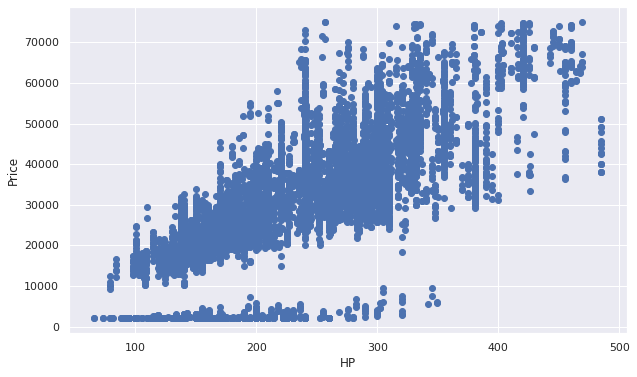

In [63]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(car_data['HP'], car_data['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

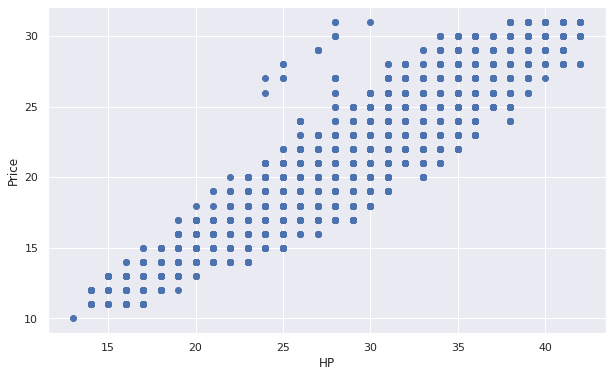

In [65]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(car_data['MPG-H'], car_data['MPG-C'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

**Heat Maps**

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

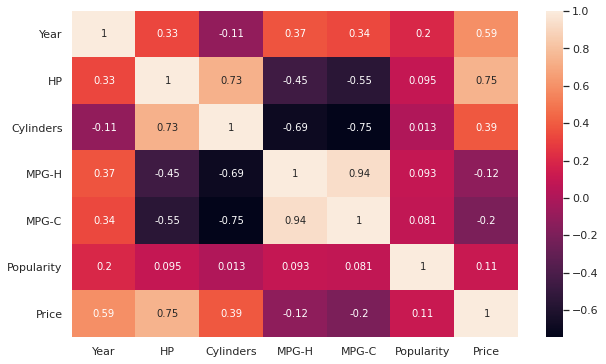

In [67]:
#Plotting Correlation Matrix
plt.figure(figsize=(10,6))
corrMatrix = car_data.corr()
sns.heatmap(corrMatrix, annot=True)

**Histogram**

Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.


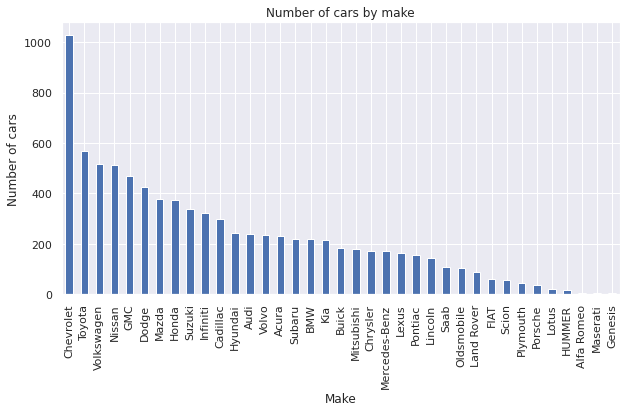

In [68]:
car_data.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Number of cars by make')
plt.ylabel('Number of cars')
plt.xlabel('Make');

### Which Vehicle Style segment of cars sold the most ?

Text(0.5, 0, 'Body type')

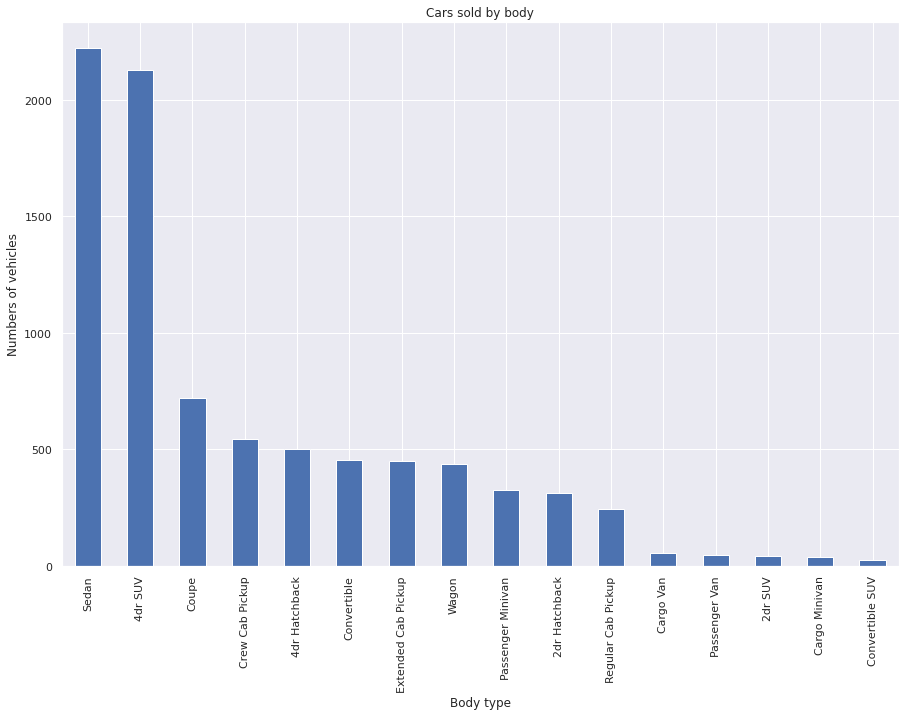

In [51]:
car_data['Vehicle Style'].value_counts().plot.bar(figsize=(15,10))
plt.title('Cars sold by body')
plt.ylabel('Numbers of vehicles')
plt.xlabel('Body type')

**Insight** : 
Sedan was the most sold vehicle style followed by 4dr SUV followed by Coupe

Text(0.5, 0, 'Count of vehicles')

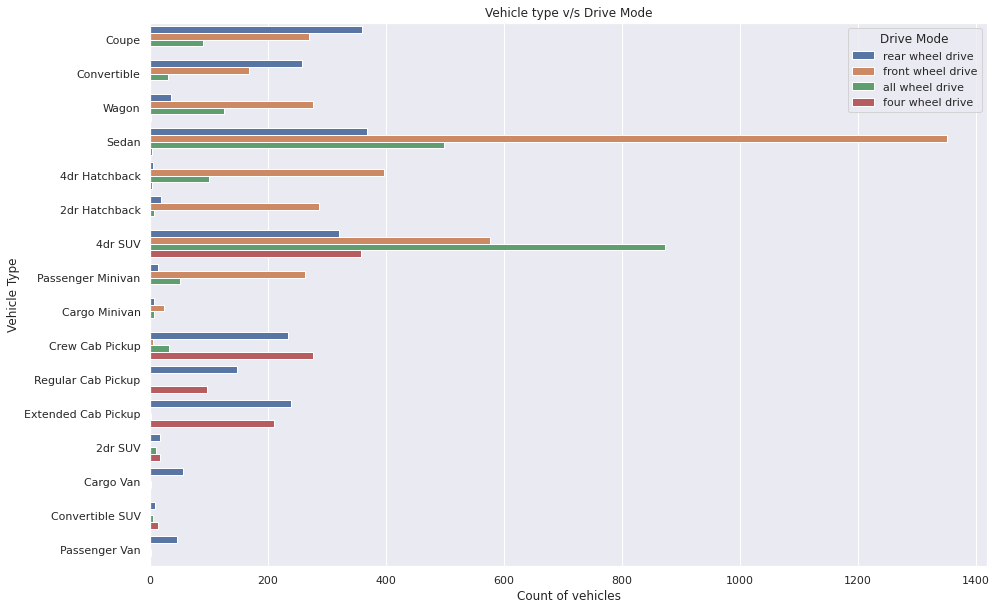

In [52]:
plt.figure(figsize=(15,10))
sns.countplot(y='Vehicle Style', data=car_data, hue='Drive Mode')
plt.title('Vehicle type v/s Drive Mode')
plt.ylabel('Vehicle Type')
plt.xlabel('Count of vehicles')

### **Making a new Price group**

In [54]:
car_data['price group']=pd.cut(car_data['Price'],[0,20000,40000,60000,80000,100000,600000],
                               labels=['<20k','20k-39k','40k-59k','60k-79k','80k-99k','>100k'],
                               include_lowest=True
                               )
car_data['price group']=car_data['price group'].astype(object)

Text(0.5, 0, 'Price Group')

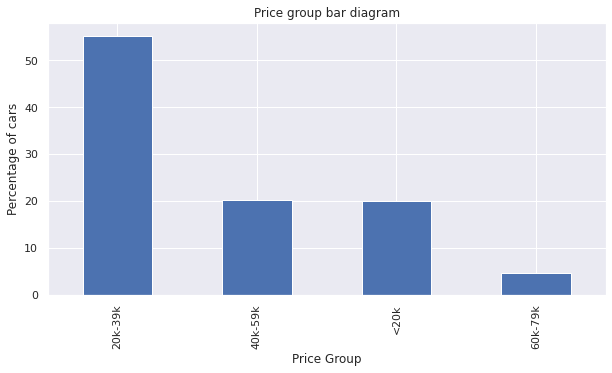

In [55]:
(car_data['price group'].value_counts()/len(car_data)*100).plot.bar(figsize=(10,5))
plt.title('Price group bar diagram')
plt.ylabel('Percentage of cars')
plt.xlabel('Price Group')

**Bar Plot**

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.



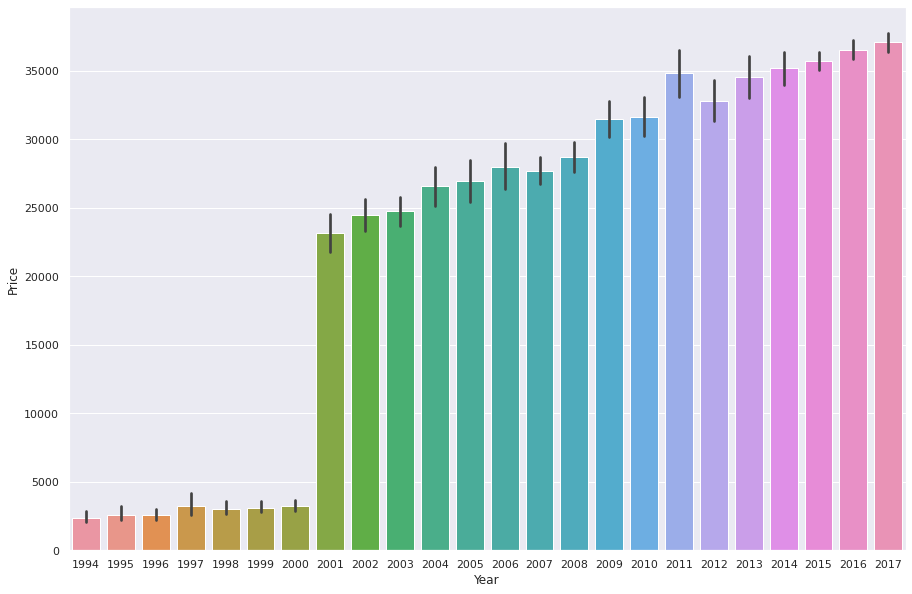

In [56]:
plt.figure(figsize=(15,10))
sns.barplot(car_data['Year'],car_data['Price'])

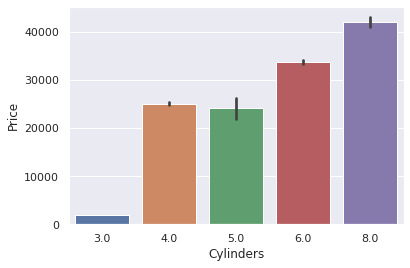

In [57]:
sns.barplot(car_data['Cylinders'],car_data['Price'])

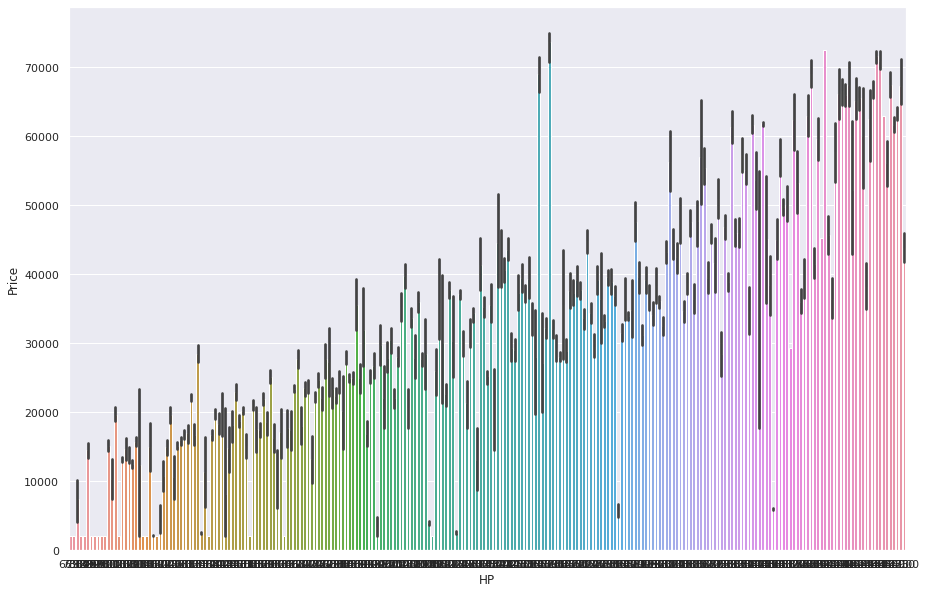

In [58]:
plt.figure(figsize=(15,10))
sns.barplot(car_data['HP'],car_data['Price'])

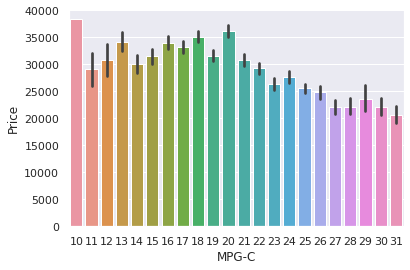

In [59]:
sns.barplot(car_data['MPG-C'],car_data['Price'])

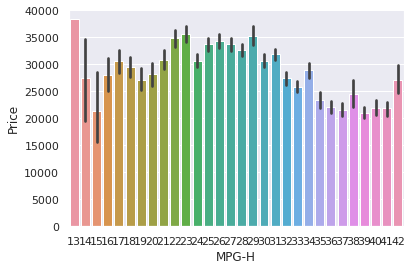

In [60]:
sns.barplot(car_data['MPG-H'],car_data['Price'])

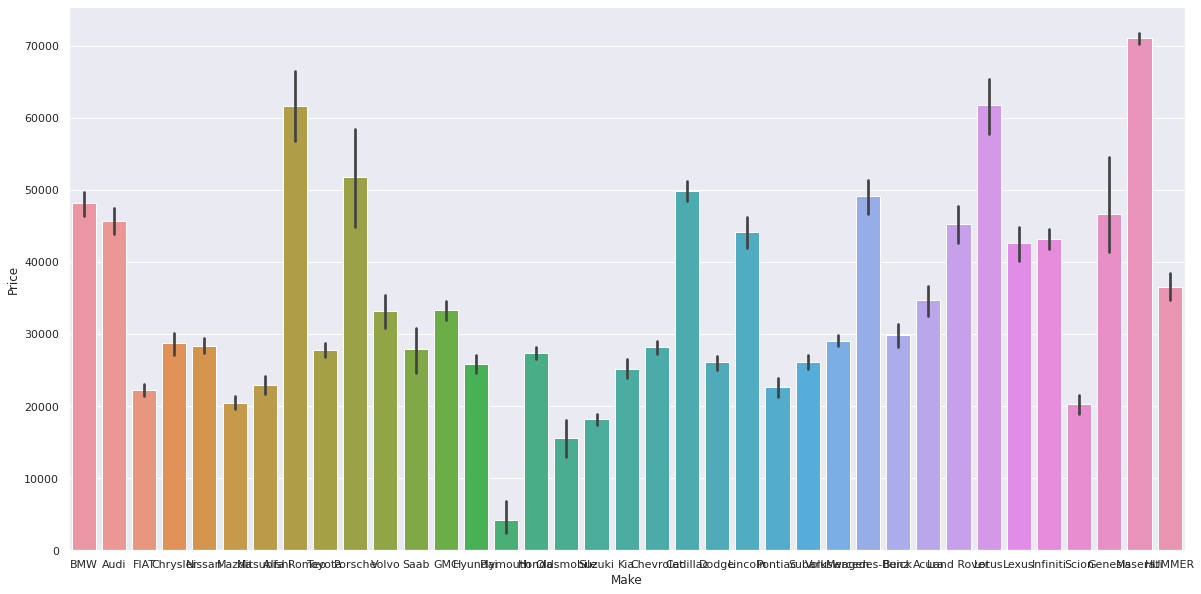

In [62]:
plt.figure(figsize=(20,10))
sns.barplot(car_data['Make'],car_data['Price'])

### 8.3 **Findings**

1. Car price increased after year 2000
2. More the no the cylinders, more is the price
3. For MPG-H 13, price is maximum and for MPG-H 15, price is lowest.
4. For MPG-C 10, price is maximum and for MPG-C 31, price is minimum

### 9. **Split the dataset into 80 and 20 ratio and build a machine learning model with Price as the target variable**

9.1 **Split the data into 80:20 ratio**

In [ ]:
dcc = car_data.select_dtypes(exclude=[np.number]).columns
dcc

Index(['Make', 'Model', 'Transmission', 'Drive Mode', 'Vehicle Style',
       'price group'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Creating the object instance
label_enc = LabelEncoder()
for i in dcc:
  car_data[i] = label_enc.fit_transform(car_data[i])
print('Label Encoded Data')
car_data.head()  

Label Encoded Data


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Style,MPG-H,MPG-C,Price,price group
0,3,1,2011,335.0,6.0,2,3,8,26,19,46135,1
1,3,0,2011,300.0,6.0,2,3,6,28,19,40650,1
2,3,0,2011,300.0,6.0,2,3,8,28,20,36350,0
3,3,0,2011,230.0,6.0,2,3,8,28,18,29450,0
4,3,0,2011,230.0,6.0,2,3,6,28,18,34500,0


In [ ]:
from sklearn import preprocessing
s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(car_data)

df_s = pd.DataFrame(df_s, columns=car_data.columns)

In [ ]:
car_data.shape

(9296, 12)

In [ ]:
# create training and testing vars
y = car_data['Price']
X_train, X_test, y_train, y_test = train_test_split(car_data, y, test_size=0.2,random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7436, 12) (7436,)
(1860, 12) (1860,)


9.2 **Machine Learning model**

9.2.1 **Linear Regression**

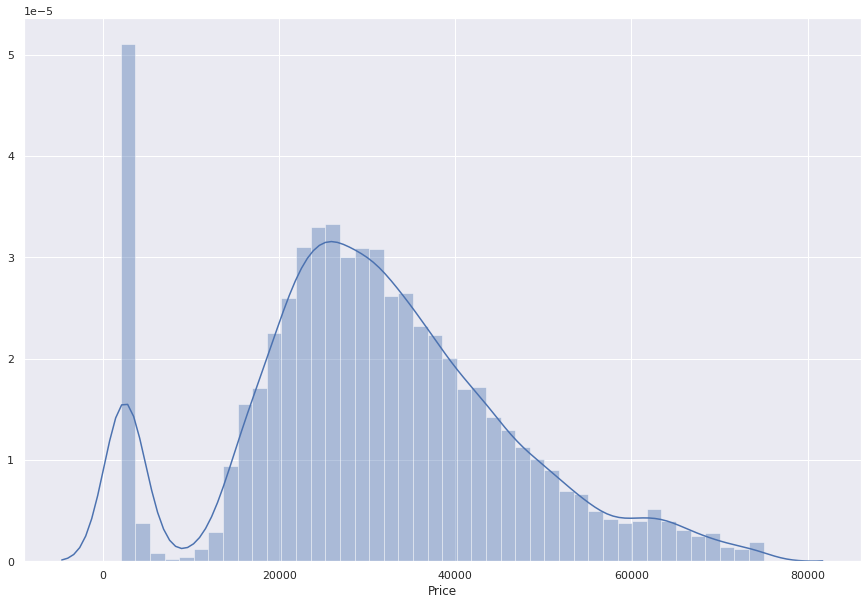

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(car_data['Price'])

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, car_data.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Make,1.399125e-14
Model,9.658940e-15
Year,1.392964e-13
HP,-5.410342e-14
Cylinders,4.613290e-13
Transmission,2.454496e-13
Drive Mode,5.802975e-13
Vehicle Style,3.057778e-14
MPG-H,-3.797939e-14
MPG-C,5.107216e-14


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [ ]:
df1

,Actual,Predicted
9485,41875,41875.0
48,46150,46150.0
2231,22260,22260.0
3332,2000,2000.0
3957,27065,27065.0
4794,16775,16775.0
5927,3652,3652.0
339,37970,37970.0
9068,22115,22115.0
10238,32390,32390.0


In [ ]:
#Fit in a model
from sklearn.linear_model import LinearRegression
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [ ]:
#To retrieve the intercept:
print(lm.intercept_)
#For retrieving the slope:
print(lm.coef_)

-3.019522409886122e-10
[ 1.39912485e-14  9.65894031e-15  1.39296398e-13 -5.41034231e-14
  4.61328960e-13  2.45449599e-13  5.80297458e-13  3.05777810e-14
 -3.79793853e-14  5.10721565e-14  1.00000000e+00  1.24000202e-15]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
9485,41875,41875.0
48,46150,46150.0
2231,22260,22260.0
3332,2000,2000.0
3957,27065,27065.0
...,...,...
1482,25690,25690.0
1153,36175,36175.0
7074,46170,46170.0
11784,66795,66795.0


Text(0, 0.5, 'Predictions')

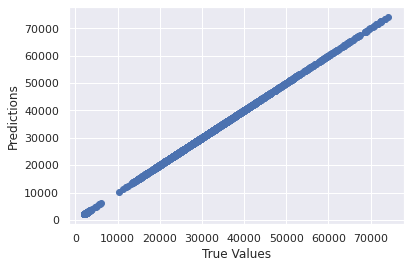

In [ ]:
## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

**Decsion tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(random_state=0)
dtc_model.fit(X_train,y_train)
y_predd=dtc_model.predict(X_test)
#Calculating the accuracies
print('Training Accuracy :',dtc_model.score(X_train,y_train))
print('Testing Accuracy :',dtc_model.score(X_test,y_test))

AttributeError: ignored

In [ ]:
## The line / model
plt.scatter(y_test, y_predd)
plt.xlabel('True Values')
plt.ylabel('Predictions')

NameError: ignored

### 10. **Try different algorithms and check their performance over metrics like R square, RMSE, MAE etc and document your findings**

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import math

In [ ]:
print('Coeffecient of determination of R squared :',r2_score(y_test,y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Coeffecient of determination of R squared : 1.0
Mean Absolute Error: 7.760410235571345e-12
Mean Squared Error: 1.2842237503827178e-22
Root Mean Squared Error: 1.1332359641234115e-11


In [ ]:
print('Coeffecient of determination of R squared :',r2_score(y_test,y_predd))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predd))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predd))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predd)))

In [ ]:
set.seed(10)


In [ ]:
one_hot_encoded_training_predictors = pd.get_dummies(car_data)

In [ ]:
import sklearn
from sklearn import ensemble,tree,model_selection
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

def get_mae(X, y):
    # multiple by -1 to make positive MAE score instead of neg value returned as sklearn convention
    return -1 * cross_val_score(RandomForestRegressor(50), 
                                X, y, 
                                scoring = 'neg_mean_absolute_error').mean()
target=car_data['Price']
predictors_without_categoricals = car_data.select_dtypes(exclude=['object'])

mae_without_categoricals = get_mae(predictors_without_categoricals, target)

mae_one_hot_encoded = get_mae(one_hot_encoded_training_predictors, target)

print('Mean Absolute Error when Dropping Categoricals: ' + str(int(mae_without_categoricals)))
print('Mean Abslute Error with One-Hot Encoding: ' + str(int(mae_one_hot_encoded)))

AttributeError: ignored

### 9. **Split the dataset into 80 and 20 ratio and build a machine learning model with Price as the target variable**

In [69]:
X = car_data[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = car_data['Price'].values

In [70]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [71]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Multiple Linear Regression model

In [72]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

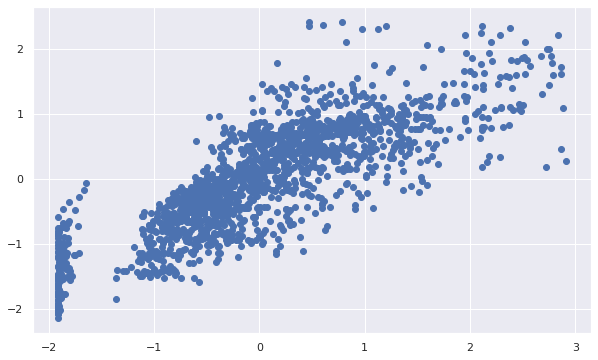

In [76]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)

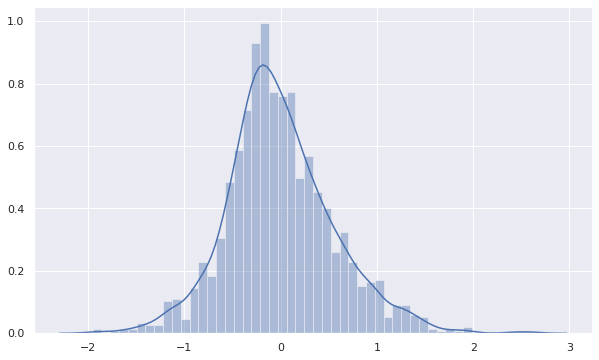

In [78]:
plt.figure(figsize=(10,6))
sns.distplot((y_test-y_pred),bins=50)

### 10. **Try different algorithms and check their performance over metrics like R square, RMSE, MAE etc and document your findings**

10.1 Checking performance over metrics like R square, RMSE, MAE for Multiple Linear Regression model

In [81]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4256788993790108
Root Mean Squared Error: 0.5578433473146853
R2 Score: 0.6800475541161142


10.2 More Algortihms and their performance over metrics like R square, RMSE, MAE

Polynomial Regression model

In [82]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

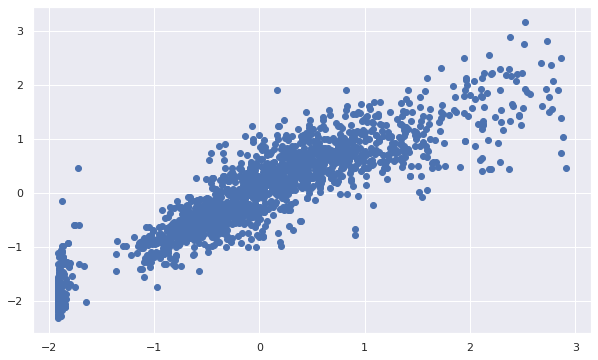

In [84]:
# Predicting a new result with Polynomial Regression
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)

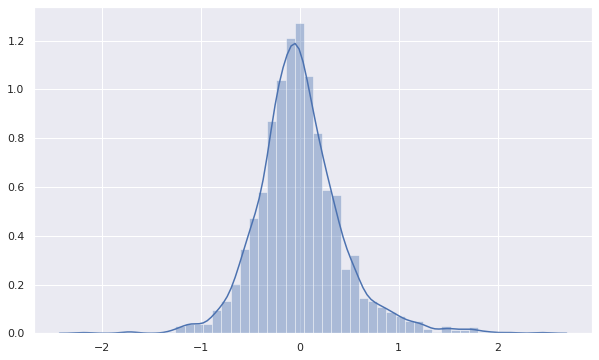

In [85]:
plt.figure(figsize=(10,6))
sns.distplot((y_test-y_pred),bins=50)

In [86]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.31573061752350967
Root Mean Squared Error: 0.4351456478672659
R2 Score: 0.8053160242314694


Suport Vector Regression (SVR) model

In [87]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

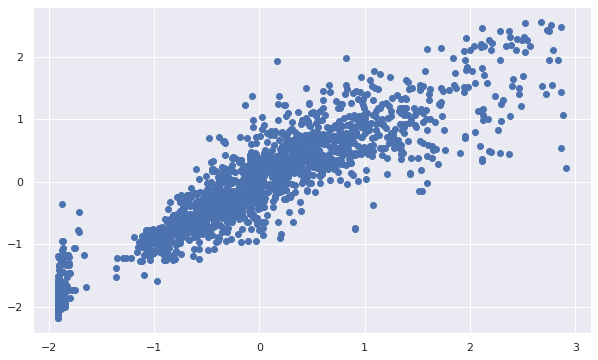

In [88]:
# Predicting a new result
y_pred = regressor.predict(X_test)
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)

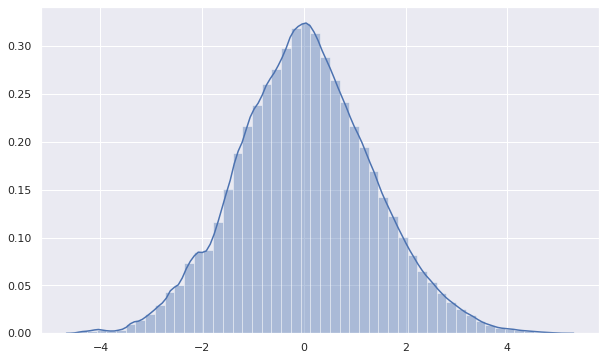

In [89]:
plt.figure(figsize=(10,6))
sns.distplot((y_test-y_pred),bins=50)

In [90]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.29633619416546725
Root Mean Squared Error: 0.42527355451237575
R2 Score: 0.814049362176249


Random Forest Regression model

In [91]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

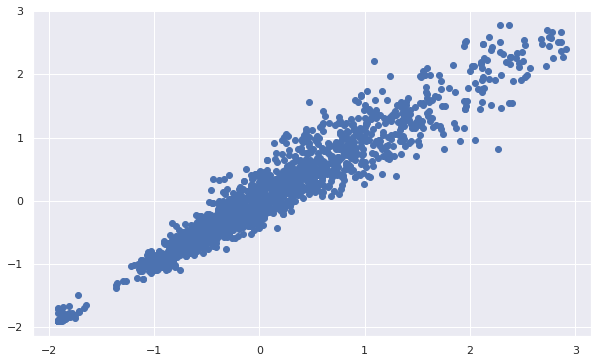

In [92]:
y_pred = regressor.predict(X_test)
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)

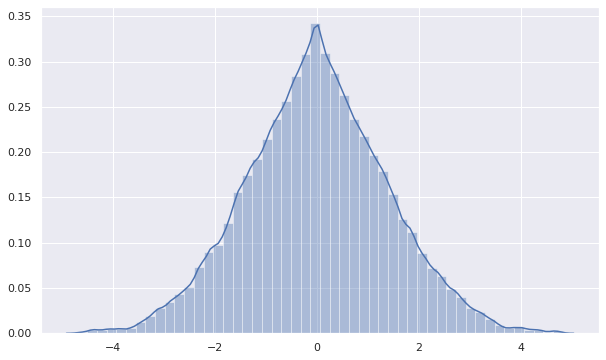

In [93]:
plt.figure(figsize=(10,6))
sns.distplot((y_test-y_pred),bins=50)

In [94]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.17769704010247667
Root Mean Squared Error: 0.24743996001244517
R2 Score: 0.9370492959370332
